<a href="https://colab.research.google.com/github/mariaseverino/cpa/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Maria Rita de Souza Severino

**Matricula**: 201820290

**Turma**: 10A

Link do repositório GitHub: 

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [92]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
import random
global_1=0
sys.setrecursionlimit(2500)

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [248]:
def insertionSort(arranjo):
  inicio = time.time()
  qtdInstrucoes = 0
  
  for j in range(1, len(arranjo)):
    chave = arranjo[j]
    i = j - 1
    while (i>=0 and arranjo[i]>chave):
      arranjo[i+1] = arranjo[i]
      i = i - 1
      qtdInstrucoes = qtdInstrucoes + 1
    arranjo[i+1] = chave
  
  fim = time.time()
  
  tempo = fim - inicio
  return arranjo, tempo, qtdInstrucoes

##  Merge Sort


In [249]:
def merge(arranjo, inicio, meio, fim):
  qtdInstrucoes = 0
  l = arranjo[inicio:meio]
  r = arranjo[meio:fim]
  i, j = 0, 0
  
  for k in range(inicio, fim):
    if i >= len(l):
      arranjo[k] = r[j]
      j = j + 1
    elif j >= len(r):
      arranjo[k] = l[i]
      i = i + 1
    elif l[i] < r[j]:
      arranjo[k] = l[i]
      i = i + 1
    else:
      arranjo[k] = r[j]
      j = j + 1
      qtdInstrucoes = qtdInstrucoes + 1
  return qtdInstrucoes

def mergeSort(arranjo, inicio, fim, inicioTime=None, qtdInstrucoes=0):
  if inicioTime == None:
    inicioTime = time.time()
  if (fim - inicio > 1):
    meio = (fim + inicio)//2
    mergeSort(arranjo, inicio,meio, inicioTime, qtdInstrucoes)
    mergeSort(arranjo, meio,fim, inicioTime, qtdInstrucoes)
    qtdInstrucoes = qtdInstrucoes + merge(arranjo, inicio, meio, fim)

  fimTime = time.time()
  
  tempo = fimTime - inicioTime
  
  return arranjo, tempo, qtdInstrucoes

##  Selection Sort


In [247]:
def selectionSort(arranjo):
  qtdInstrucoes = 0
  inicio = time.time()

  for j in range(len(arranjo)):
    min = arranjo[j]
    minIndex = j
    for i in range(j, len(arranjo)):
      if (arranjo[i] < min):
        qtdInstrucoes = qtdInstrucoes + 1
        min = arranjo[i]
        minIndex = i
        
    arranjo[minIndex] = arranjo[j]
    arranjo[j] = min

  fim = time.time()
  tempo = fim - inicio
  return arranjo, tempo, qtdInstrucoes

##  Bubble Sort


In [270]:
def bubbleSort(arranjo, n):
  qtdInstrucoes = 0
  inicio = time.time()
  
  for i in range(n):
    for j in range(n-i):
      if (arranjo[j] > arranjo[j+1]):
        arranjo[j], arranjo[j+1] = arranjo[j+1], arranjo[j]
        qtdInstrucoes = qtdInstrucoes + 1
    
  fim = time.time()
  tempo = fim - inicio
  return arranjo, tempo, qtdInstrucoes

## Heap Sort

In [251]:
def esquerda(i):
  return 2*i

def direita(i):
  return 2*i + 1

def heapfy(arranjo, n, i):
  qtdInstrucoes = 0

  esq = esquerda(i)
  dir = direita(i)
  maior = i
  if (esq < n and arranjo[esq] > arranjo[i]):
    maior = esq
    qtdInstrucoes = qtdInstrucoes + 1

  if (dir < n and arranjo[dir] > arranjo[maior]):
    maior = dir
    qtdInstrucoes = qtdInstrucoes + 1

  if (maior != i):
    qtdInstrucoes = qtdInstrucoes + 1
    arranjo[i], arranjo[maior] = arranjo[maior], arranjo[i]
    heapfy(arranjo, n, maior)
  
  return qtdInstrucoes 

def heapSort(arranjo):
  qtdInstrucoes = 0
  inicio = time.time()

  for i in range(len(arranjo)//2, -1, -1):
    qtdInstrucoes = qtdInstrucoes + heapfy(arranjo, len(arranjo), i)

  for i in range(len(arranjo)-1, 0, -1):
    arranjo[i], arranjo[0] = arranjo[0], arranjo[i]
    qtdInstrucoes = qtdInstrucoes + heapfy(arranjo, i, 0)

  fim = time.time()
  tempo = fim - inicio
  return arranjo, tempo, qtdInstrucoes

## Quick Sort

> pivo = *A[A-comprimento]*

In [252]:
def partition(arranjo, inicio, fim):
  qtdInstrucoes = 0
  pivo = arranjo[fim]
  i = inicio
  for j in range(inicio, fim):
    if arranjo[j] <= pivo:
      arranjo[j], arranjo[i] = arranjo[i], arranjo[j]
      i = i + 1
      qtdInstrucoes = qtdInstrucoes + 1
  arranjo[i], arranjo[fim] = arranjo[fim], arranjo[i]
  return i, qtdInstrucoes

def quickSort(arranjo, inicio, fim, inicioTime=None, qtdInstrucoes=0):
  if inicioTime == None:
    inicioTime = time.time()
  
  if inicio < fim:
    q, qtd = partition(arranjo, inicio, fim)
    qtdInstrucoes = qtdInstrucoes + qtd

    quick = quickSort(arranjo, inicio, q-1, inicioTime, qtdInstrucoes)
    qtdInstrucoes = qtdInstrucoes + quick[2]

    quick = quickSort(arranjo, q+1, fim, inicioTime, qtdInstrucoes)
    qtdInstrucoes = qtdInstrucoes + quick[2]
   
  fimTime = time.time()
  tempo = fimTime - inicioTime
  return arranjo, tempo, qtdInstrucoes

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
print("Boa sorte!!!")

Boa sorte!!!


# Resolvendo o exercicio

## 1) a.

In [9]:
def geraArranjo(n):
  A = np.random.randint(5,1000, n)
  return A.tolist()

### Insertion Sort

In [291]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1, 101):
  melhor = np.arange(5, 50*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))

  ordena = insertionSort(aleatorio)
  ordena2 = insertionSort(melhor)
  ordena3 = insertionSort(pior)

  tempos.append(ordena[2])
  tempos2.append(ordena2[2])
  tempos3.append(ordena3[2])

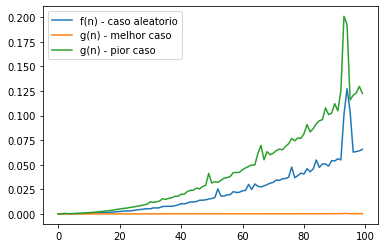

In [256]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

### MergeSort

In [301]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1,101):
  melhor = np.arange(5, 50*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))

  ordena = mergeSort(aleatorio, 0, len(aleatorio))
  ordena2 = mergeSort(melhor, 0, len(melhor))
  ordena3 = mergeSort(pior, 0, len(pior))

  tempos.append(ordena[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])


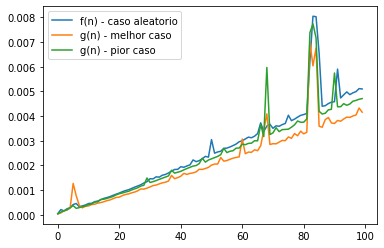

In [302]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

###  Selection Sort

In [298]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1, 101):
  melhor = np.arange(5, 50*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))

  ordena = selectionSort(aleatorio)
  ordena2 = selectionSort(melhor)
  ordena3 = selectionSort(pior)

  tempos.append(ordena[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])

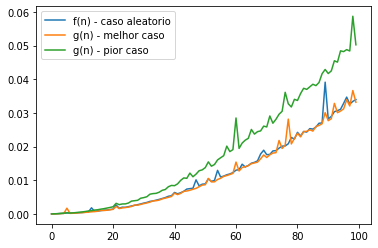

In [284]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

###  Bubble Sort


In [289]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1, 101):
  melhor = np.arange(5, 50*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))

  ordena = bubbleSort(aleatorio, len(aleatorio)-1)
  ordena2 = bubbleSort(melhor, len(melhor)-1)
  ordena3 = bubbleSort(pior, len(pior)-1)

  tempos.append(ordena[2])
  tempos2.append(ordena2[2])
  tempos3.append(ordena3[2])

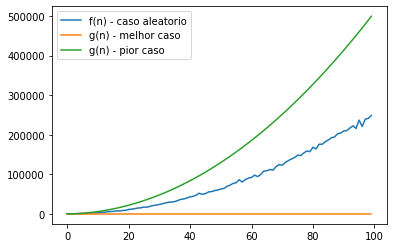

In [290]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

### Heap Sort

In [307]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1, 101):
  melhor = np.arange(5, 50*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))

  ordena = heapSort(aleatorio)
  ordena2 = heapSort(melhor)
  ordena3 = heapSort(pior)

  tempos.append(ordena[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])

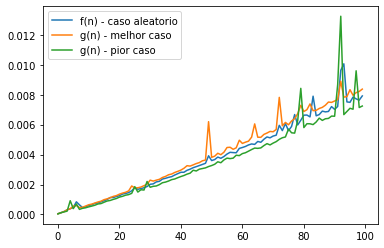

In [308]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

### Quick Sort

In [309]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1,101):
  melhor = np.arange(5, 50*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))
  
  ordena = quickSort(aleatorio, 0, len(aleatorio)-1)
  ordena2 = quickSort(melhor, 0, len(melhor)-1)
  ordena3 = quickSort(pior, 0, len(pior)-1)

  tempos.append(ordena[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])


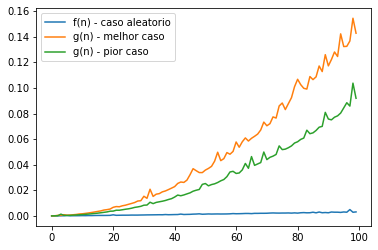

In [310]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

## 1) b.

In [334]:
tempos = []
tempos2 = []
tempos3 = []
tempos4 = []
tempos5 = []
tempos6 = []

for i in range(1, 101):
  melhorInsertionSort = np.arange(5, 10*i+5, 5).tolist()
  melhorBubbleSort = melhorInsertionSort
  melhorSelectionSort = melhorInsertionSort
  melhorHeap = melhorInsertionSort
  melhorMergeSort = melhorInsertionSort
  melhorQuickSort = melhorInsertionSort

  ordena1 = insertionSort(melhorInsertionSort)
  ordena2 = bubbleSort(melhorBubbleSort, len(melhorBubbleSort)-1)
  ordena3 = selectionSort(melhorSelectionSort)
  ordena4 = heapSort(melhorHeap)
  ordena5 = mergeSort(melhorMergeSort, 0, len(melhorMergeSort))
  ordena6 = quickSort(melhorQuickSort, 0, len(melhorQuickSort)-1)

  tempos.append(ordena1[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])
  tempos4.append(ordena4[1])
  tempos5.append(ordena5[1])
  tempos6.append(ordena6[1])
  

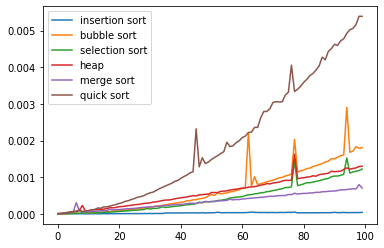

In [335]:
plt.plot(tempos, label='insertion sort')
plt.plot(tempos2, label='bubble sort')
plt.plot(tempos3, label='selection sort')
plt.plot(tempos4, label='heap')
plt.plot(tempos5, label='merge sort')
plt.plot(tempos6, label='quick sort')
plt.legend();

In [340]:
tempos = []
tempos2 = []
tempos3 = []
tempos4 = []
tempos5 = []
tempos6 = []

for i in range(1, 101):
  piorInsertionSort = np.arange(5, 10*i+5, 5).tolist()

  piorInsertionSort = piorInsertionSort[::-1]
  piorBubbleSort = piorInsertionSort
  piorSelectionSort = piorInsertionSort
  piorHeap = piorInsertionSort
  piorMergeSort = piorInsertionSort
  piorQuickSort = piorInsertionSort

  ordena1 = insertionSort(piorInsertionSort)
  ordena2 = bubbleSort(piorBubbleSort, len(piorBubbleSort)-1)
  ordena3 = selectionSort(piorSelectionSort)
  ordena4 = heapSort(piorHeap)
  ordena5 = mergeSort(melhorMergeSort, 0, len(melhorMergeSort))
  ordena6 = quickSort(melhorQuickSort, 0, len(melhorQuickSort)-1)

  tempos.append(ordena1[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])
  tempos4.append(ordena4[1])
  tempos5.append(ordena5[1])
  tempos6.append(ordena6[1])
  

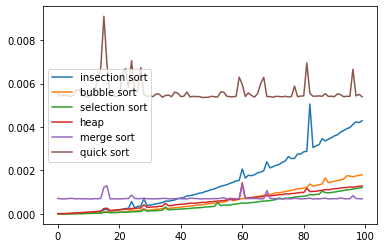

In [341]:
plt.plot(tempos, label='insection sort')
plt.plot(tempos2, label='bubble sort')
plt.plot(tempos3, label='selection sort')
plt.plot(tempos4, label='heap')
plt.plot(tempos5, label='merge sort')
plt.plot(tempos6, label='quick sort')
plt.legend();

In [347]:
tempos = []
tempos2 = []
tempos3 = []
tempos4 = []

for i in range(1,101):
  aleatorioInsertionSort = geraArranjo(i*10)
  aleatorioBubbleSort = aleatorioInsertionSort
  aleatorioSelectionSort = aleatorioInsertionSort
  aleatorioHeap = aleatorioInsertionSort
  aleatorioMergeSort = aleatorioInsertionSort
  aleatorioQuickSort = aleatorioInsertionSort

  ordena1 = insertionSort(aleatorioInsertionSort)
  ordena2 = bubbleSort(aleatorioBubbleSort, len(aleatorioBubbleSort)-1)
  ordena3 = selectionSort(aleatorioSelectionSort)
  ordena4 = heapSort(aleatorioHeap)

  tempos.append(ordena1[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])
  tempos4.append(ordena4[1])
 

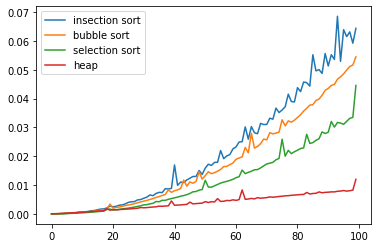

In [348]:
plt.plot(tempos, label='insection sort')
plt.plot(tempos2, label='bubble sort')
plt.plot(tempos3, label='selection sort')
plt.plot(tempos4, label='heap')
plt.legend();

## 1) c.

### Insertion Sort

Dá para se perceber pelo grafico do algoritimo bubleSort que o numero de comparações feitas felo algoritimo cresce de forma quadratica no pior caso, já no melhor caso ele tem um comportamento constante em relação a quantidade comparações.


### Merge Sort

Observando o grafico do algoritomo do mergeSort, nota-se que no pior caso, tanto no melhor caso, quanto no caso aleatorio o tempo de execução demostra um crescimento linear

### Selection Sort

Observando o grafico do algoritomo do selectionSort, nota-se que no pior caso, tanto no melhor caso, quanto no caso aleatorio o tempo de execução demostra um crescimento quadratico

### Bubble Sort

Dá para se perceber pelo grafico do algoritimo insertionSort que o numero de comparações feitas felo algoritimo cresce de forma quadratica no pior caso, já no melhor caso ele tem um comportamento constante em relação a quantidade comparações.

### Heap

Observando o grafico do algoritomo heap, nota-se que no pior caso, tanto no melhor caso, quanto no caso aleatorio o tempo de execução demostra um crescimento linear

### Quick Sort

Observando o grafico do algoritomo do quickSort, nota-se que no pior caso, tanto no melhor caso o tempo de execução demostra um crescimento linear, já o caso aleatorio demostra ter um comportamento constante. É notavel também que o melhor caso demostrar ter um crescimento do tempo de execução maior que o pior caso.

## 2)

In [312]:
def numAleatorio(inicio, fim):
  pivo = random.randint(inicio,fim)
  return pivo

In [316]:
def partitionAleatorio(arranjo, inicio, fim):
  qtdInstrucoes = 0
  pivo = arranjo[fim]
  i = inicio
  for j in range(inicio, fim):
    if arranjo[j] <= pivo:
      arranjo[j], arranjo[i] = arranjo[i], arranjo[j]
      i = i + 1
      qtdInstrucoes = qtdInstrucoes + 1
  arranjo[i], arranjo[fim] = arranjo[fim], arranjo[i]
  return i, qtdInstrucoes

def quickSortAleatorio(arranjo, inicio, fim, inicioTime=None, qtdInstrucoes=0):
  if inicioTime == None:
    inicioTime = time.time()
  
  if inicio < fim:
    q, qtd = partitionAleatorio(arranjo, inicio, fim)
    qtdInstrucoes = qtdInstrucoes + qtd

    quick = quickSortAleatorio(arranjo, inicio, q-1, inicioTime, qtdInstrucoes)
    qtdInstrucoes = qtdInstrucoes + quick[2]

    quick = quickSortAleatorio(arranjo, q+1, fim, inicioTime, qtdInstrucoes)
    qtdInstrucoes = qtdInstrucoes + quick[2]
   
  fimTime = time.time()
  tempo = fimTime - inicioTime
  return arranjo, tempo, qtdInstrucoes

In [325]:
tempos = []
tempos2 = []
tempos3 = []

for i in range(1,100):
  melhor = np.arange(5, 10*i+5, 5).tolist()
  pior = melhor[::-1]
  aleatorio = geraArranjo(len(melhor))

  ordena = quickSortAleatorio(aleatorio, 0, len(aleatorio)-1)
  ordena2 = quickSortAleatorio(melhor, 0, len(melhor)-1)
  ordena3 = quickSortAleatorio(pior, 0, len(pior)-1)

  tempos.append(ordena[1])
  tempos2.append(ordena2[1])
  tempos3.append(ordena3[1])


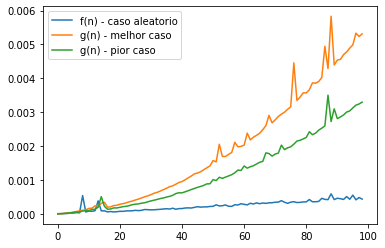

In [326]:
plt.plot(tempos, label='f(n) - caso aleatorio')
plt.plot(tempos2, label='g(n) - melhor caso')
plt.plot(tempos3, label='g(n) - pior caso')
plt.legend();

In [327]:
tempos = []
tempos2 = []

for i in range(1,100):
  aleatorio = geraArranjo(i*10)

  ordena = quickSortAleatorio(aleatorio, 0, len(aleatorio)-1)
  ordena2 = quickSort(aleatorio, 0, len(aleatorio)-1)
 
  tempos.append(ordena[1])
  tempos2.append(ordena2[1])


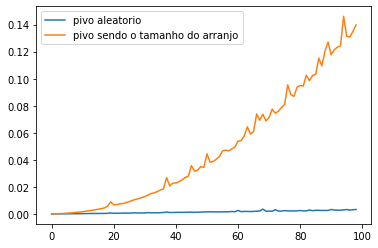

In [328]:
plt.plot(tempos, label='pivo aleatorio')
plt.plot(tempos2, label='pivo sendo o tamanho do arranjo')
plt.legend();